# Atividade dos filtros rejeita-faixa

In [ ]:
import numpy as np # para usar funções que lidam com vetores

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
# Make gaph resolution to match the dpi of the Screen
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

from IPython.display import (Audio, display, clear_output) # widget com os botões de play, volume e download
from scipy import signal
import soundfile as sf

stm32_fs = 48000

# Fução que converte o SOS para o array que será utilizado no STM32
def SOS_to_STM32(SOS):
    #SOS2 = np.delete(SOS, (np.where(np.all(SOS == 1, axis=0))[0][0]), axis=1)
    SOS2 = np.delete(SOS, 3, axis=1)
    SOS2[:, -2:] *= -1
    print(','.join(map(str, SOS2.flatten())))

Áudio Original


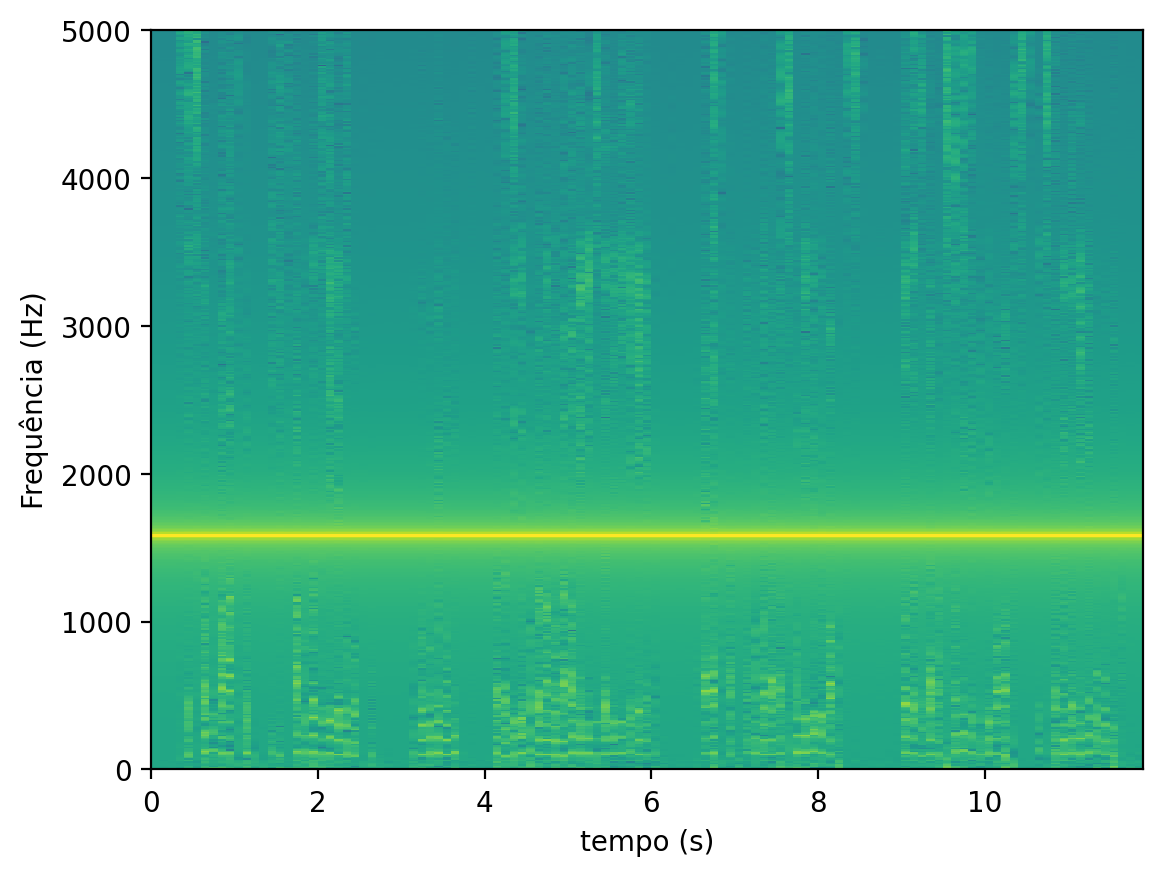

In [ ]:
# Análise do áudio:
filename = "audio-teste-ruido-G6.wav"
audio,fs = sf.read(filename)

print('Áudio Original')
display(Audio(audio, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 5000])
plt.show()

A faixa de frequência incômoda parece estar em 1585Hz, onde é possível ver uma potência contínua e de nivél consideravelmente superior ás suas vizinhas

In [ ]:
filter_freq = 1585

# FIR

## Montando o filtro:    
Gerando um filtro rejeita-banda:  


-5.052598619030528e-05,3.885005345373571e-05,0.00013559775885525277,0.00023644352361686588,0.0003375561368277519,0.0004345558082212533,0.0005225699805417606,0.0005963543043715139,0.0006504913128147063,0.0006796706846219561,0.0006790443311970466,0.0006446379908947389,0.0005737898648417047,0.0004655774518878147,0.00032118743140507184,0.00014418127907731985,-5.938798692001107e-05,-0.00028104466287547645,-0.0005101687596508424,-0.0007344909307978322,-0.0009407910556511014,-0.0011157665138074439,-0.0012470158145136624,-0.0013240656530755445,-0.001339356644312655,-0.0012890966466315126,-0.0011738920002014467,-0.0009990768094171759,-0.0007746785339281186,-0.0005149837734564042,-0.00023769964266829902,3.725873513847481e-05,0.00028928812305111217,0.0004988242713222418,0.0006491477929262788,0.000728120538339536,0.0007296952323581653,0.0006550448040027088,0.0005131749479710792,0.00032091373520076364,0.00010221413941422079,-0.0001132433349541022,-0.0002921036218933145,-0.0003999426686684106,-0.000

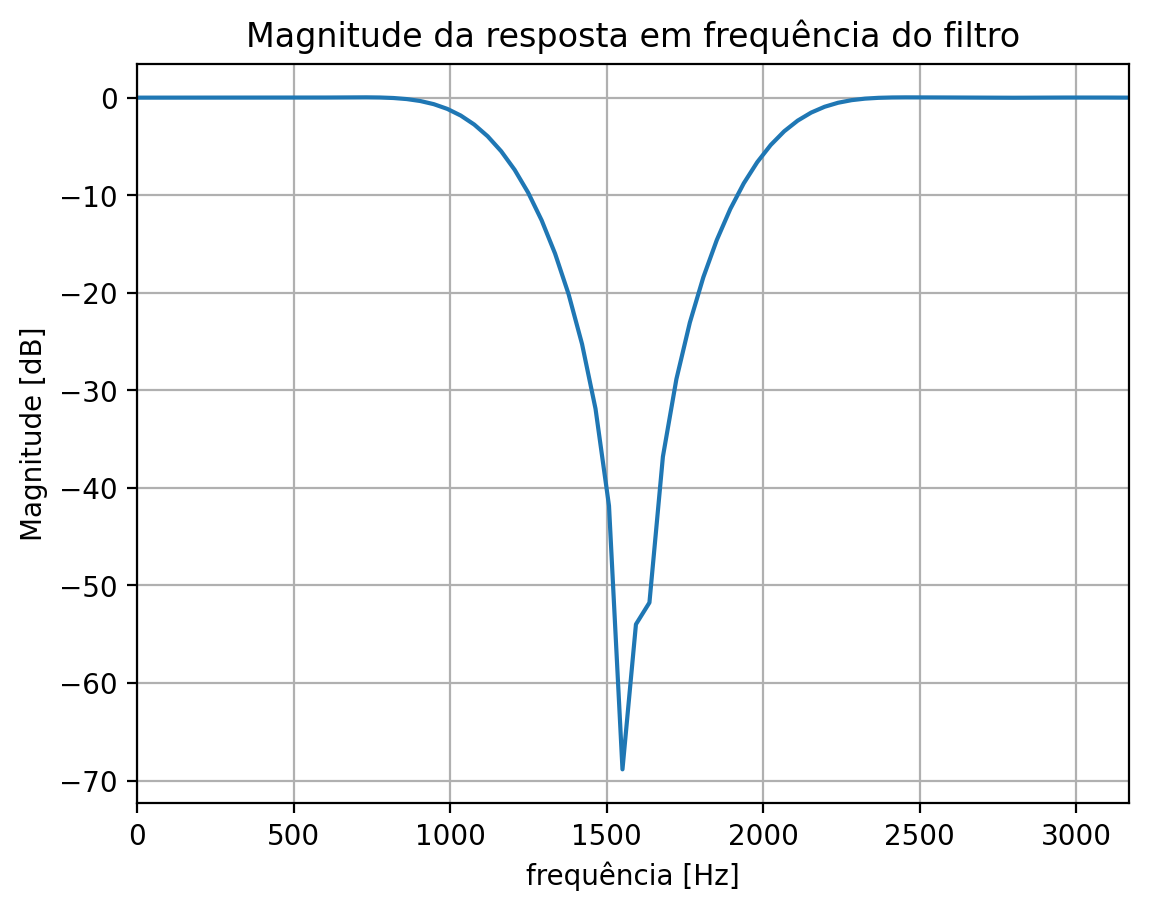

In [ ]:
freq_spread = 410

# Projeto de um filtro FIR usando firwin
B = signal.firwin(199, [filter_freq-freq_spread,filter_freq+freq_spread], fs=stm32_fs, pass_zero=True)
### Print coeficients on int and float forms
print(','.join(map(str, B)))
for i in range(len(B)):
    print(np.int16(B[i] * np.iinfo(np.int16).max), end=', ')


B = signal.firwin(199, [filter_freq-freq_spread,filter_freq+freq_spread], fs=fs, pass_zero=True)
w, H = signal.freqz(B, 1)

plt.plot(fs/2 * w/np.pi , 20*np.log10(abs(H)))
plt.title('Magnitude da resposta em frequência do filtro')
plt.xlabel('frequência [Hz]')
plt.ylabel('Magnitude [dB]')
plt.xlim([0, filter_freq*2])
plt.grid()
plt.show()

## Sinal filtrado em Software:

Áudio Filtrado por filtro Rejeita-Faixa


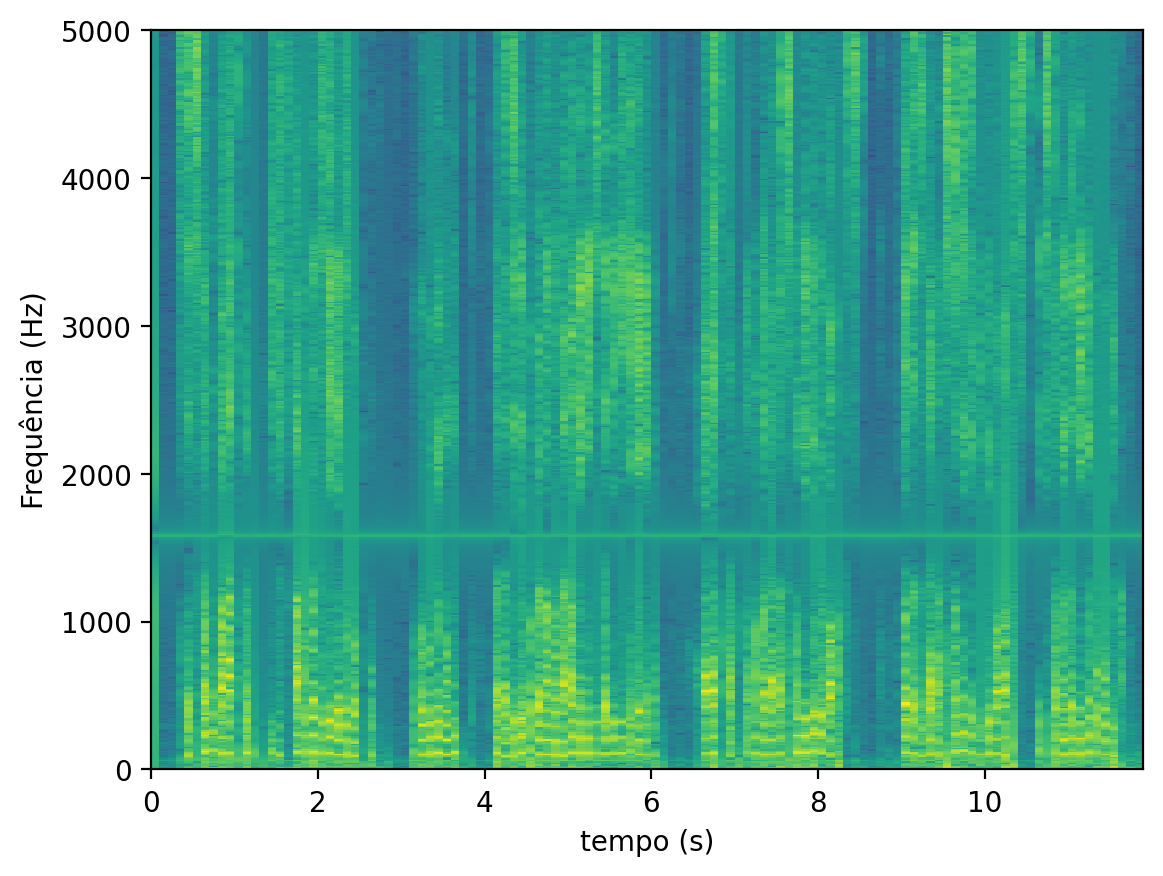

In [ ]:
# Filter signal
audio_filtrado = signal.lfilter(B, 1, audio)

print('Áudio Filtrado por filtro Rejeita-Faixa')
display(Audio(audio_filtrado, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_filtrado, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 5000])
plt.show()

## Sinal filtrado em hardware:

In [ ]:
# Ponto Fixo:
filename = "gravacao stm32 fir int.wav"
audio_hardware,fs = sf.read(filename)

print("Sinal filtrado em hardware: Ponto Fixo 16 bits")
display(Audio(audio_hardware, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_hardware, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 5000])
plt.show()

# Ponto Flutuante:
filename = "gravacao stm32 fir float.wav"
audio_hardware,fs = sf.read(filename)

print("Sinal filtrado em hardware: Ponto Flutuante 32 bits")
display(Audio(audio_hardware, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_hardware, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 5000])
plt.show()


# Ponto Fixo:
filename = "gravacao stm32 fir int sweep.wav"
audio_hardware,fs = sf.read(filename)

print("Sweep filtrado em hardware: Ponto Fixo 16 bits")
display(Audio(audio_hardware, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_hardware, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.2) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 20000])
plt.show()

# Ponto Flutuante:
filename = "gravacao stm32 fir float sweep.wav"
audio_hardware,fs = sf.read(filename)

print("Sweep filtrado em hardware: Ponto Flutuante 32 bits")
display(Audio(audio_hardware, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_hardware, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.2) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 20000])
plt.show()

A saída desta célula é muito grande e só pode ser exibida após o login.


# IRR

## Montando o filtro:    
Gerando um filtro rejeita-banda:  


0.9187584543022239,-1.7987258049235,0.9187584543022241,1.9078207349362928,-0.9489645667148798,1.0,-1.9577787790694032,1.0000000000000002,1.9075798912310449,-0.9555216801420867,1.0,-1.9577787790694032,1.0000000000000002,1.9258771114045397,-0.9615255045575067,1.0,-1.9577787790694032,1.0000000000000002,1.9288593395168956,-0.9820720105026549,1.0,-1.9577787790694032,1.0000000000000002,1.952899203518493,-0.9858435805146365


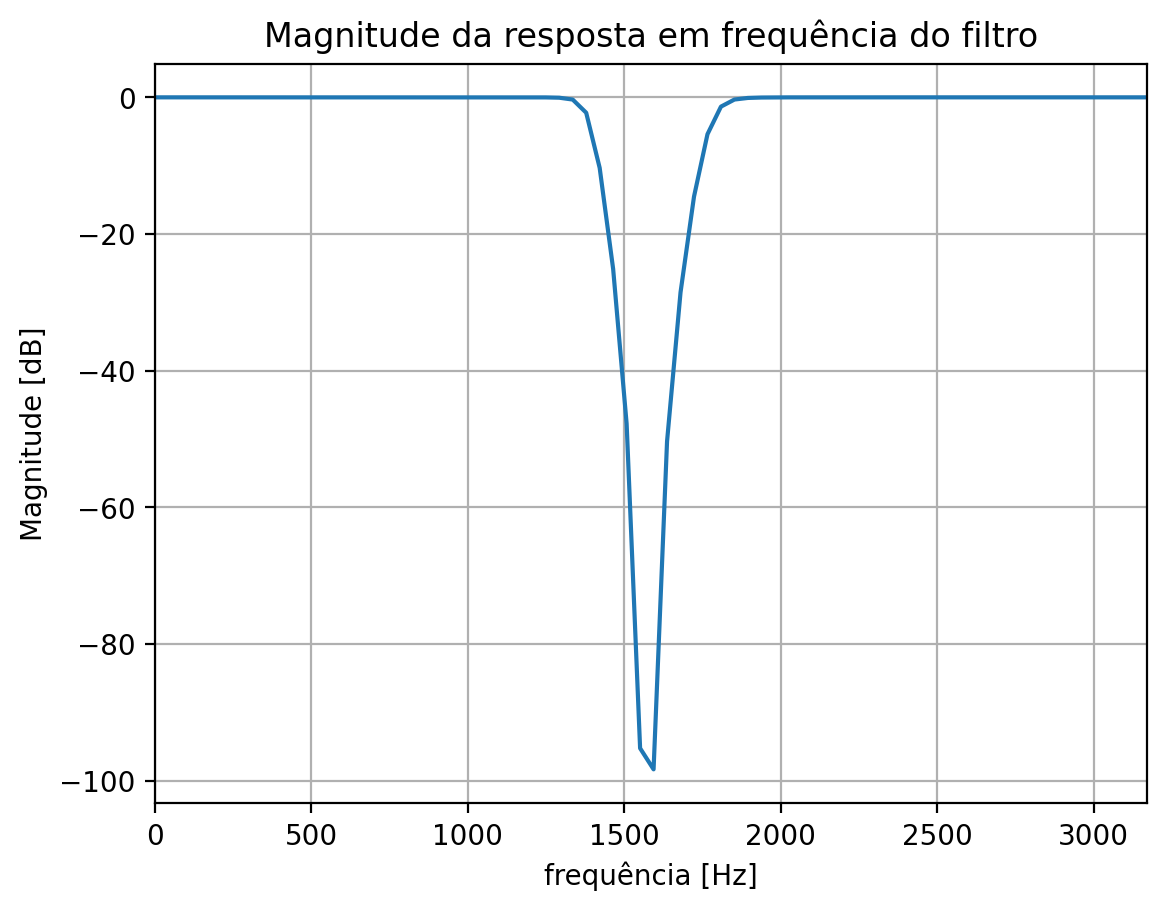

In [ ]:
freq_spread = 200
SOS = signal.butter(5, [filter_freq-freq_spread,filter_freq+freq_spread], btype='bandstop', output='sos', fs=stm32_fs)
SOS_to_STM32(SOS)

SOS = signal.butter(5, [filter_freq-freq_spread,filter_freq+freq_spread], btype='bandstop', output='sos', fs=fs)
w, H = signal.sosfreqz(SOS)

plt.plot(fs/2 * w/np.pi , 20*np.log10(abs(H)))
plt.title('Magnitude da resposta em frequência do filtro')
plt.xlabel('frequência [Hz]')
plt.ylabel('Magnitude [dB]')
plt.xlim([0, filter_freq*2])
plt.grid()
plt.show()

## Sinal filtrado em Software:

Áudio Filtrado por filtro Rejeita-Faixa IRR


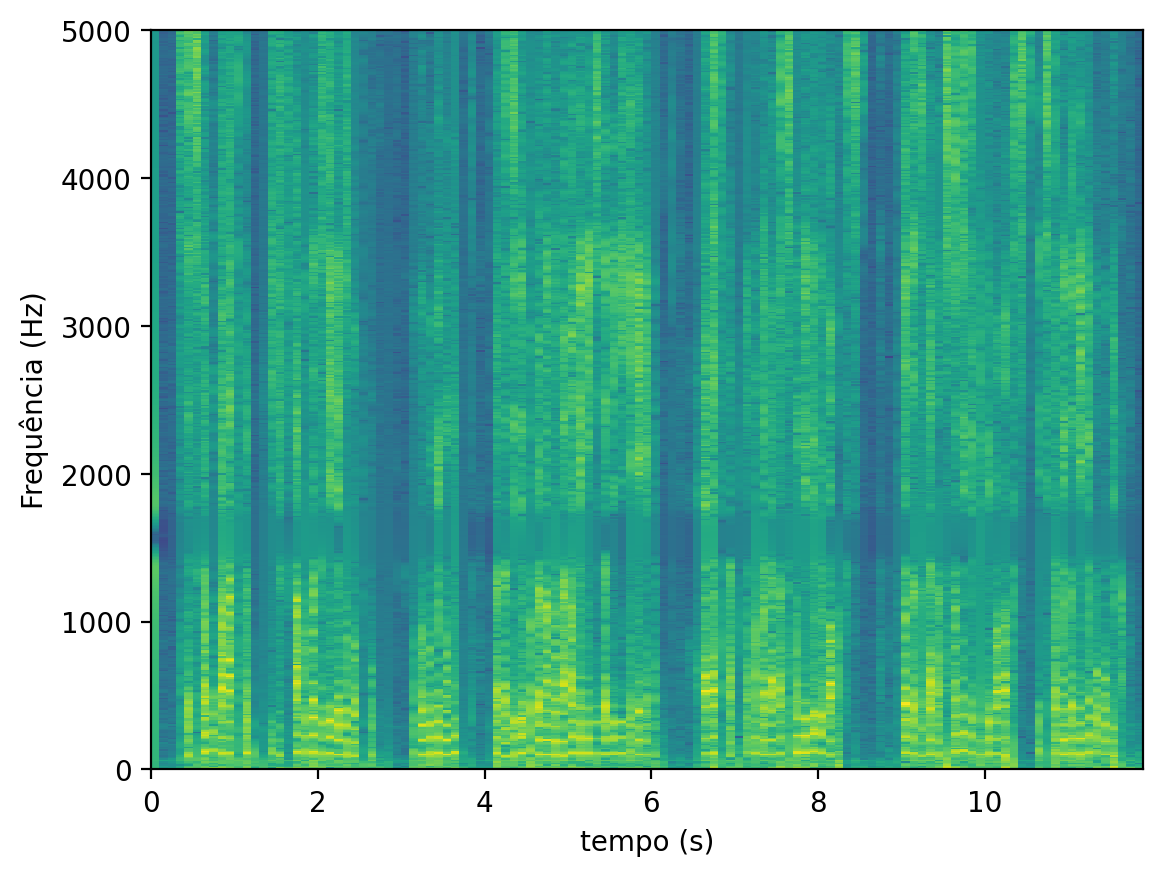

In [ ]:
# Filter signal
audio_filtrado = signal.sosfilt(SOS, audio)

print('Áudio Filtrado por filtro Rejeita-Faixa IRR')
display(Audio(audio_filtrado, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_filtrado, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 5000])
plt.show()

## Sinal filtrado em hardware:

In [ ]:
# Ponto Flutuante:
filename = "gravacao stm32 irr.wav"
audio_hardware,fs = sf.read(filename)

print("Sinal filtrado em hardware:")
display(Audio(audio_hardware, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_hardware, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 5000])
plt.show()


# Ponto Flutuante:
filename = "gravacao stm32 irr sweep.wav"
audio_hardware,fs = sf.read(filename)

print("Sweep filtrado em hardware:")
display(Audio(audio_hardware, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_hardware, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.2) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 20000])
plt.show()

A saída desta célula é muito grande e só pode ser exibida após o login.


# NOTCH

## Montando o filtro:    
Gerando um filtro rejeita-banda:  


In [ ]:
# Função Filtro Notch IRR
def notch_filter(alpha, rho, freq,fs):
    cos_omega = np.cos(2*np.pi*freq/fs)
    alpha_plus_1 = alpha + 1
    b = [alpha_plus_1, - 2*alpha_plus_1*cos_omega, alpha_plus_1]
    a = [alpha_plus_1, -2*(alpha + rho)*cos_omega, rho**2 + alpha]
    return np.array(b)/alpha_plus_1,np.array(a)/alpha_plus_1

[ 0.98707844 -1.931819    0.98707844] [ 1.         -1.931819    0.97415687]
0.9870784354608405,-1.9318190011749423,0.9870784354608407,1.9318190011749423,-0.9741568709216811


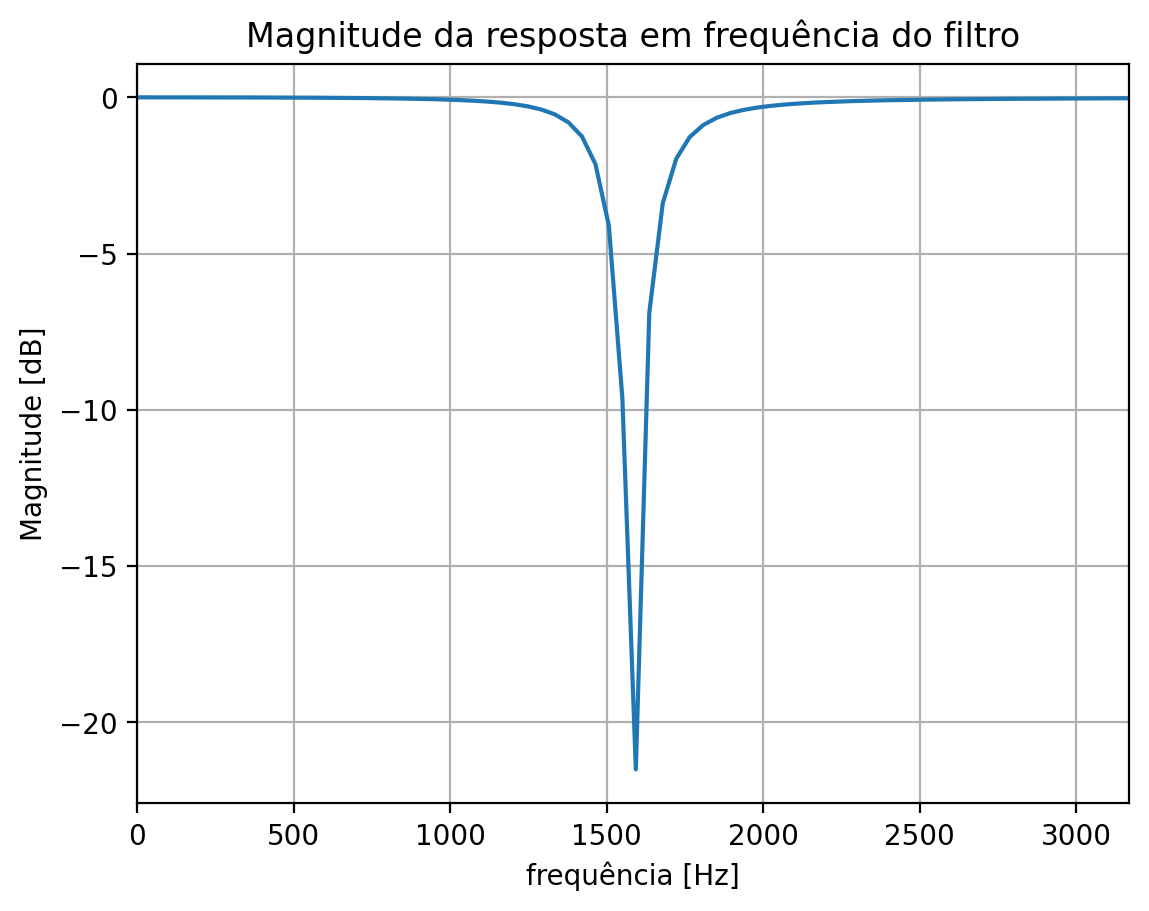

[ 1.        -1.9571079  1.       ] [ 1.         -1.93264405  0.9753125 ]
1.0,-1.9571078971784321,1.0000000000000002,1.9326440484637013,-0.9753124999999997


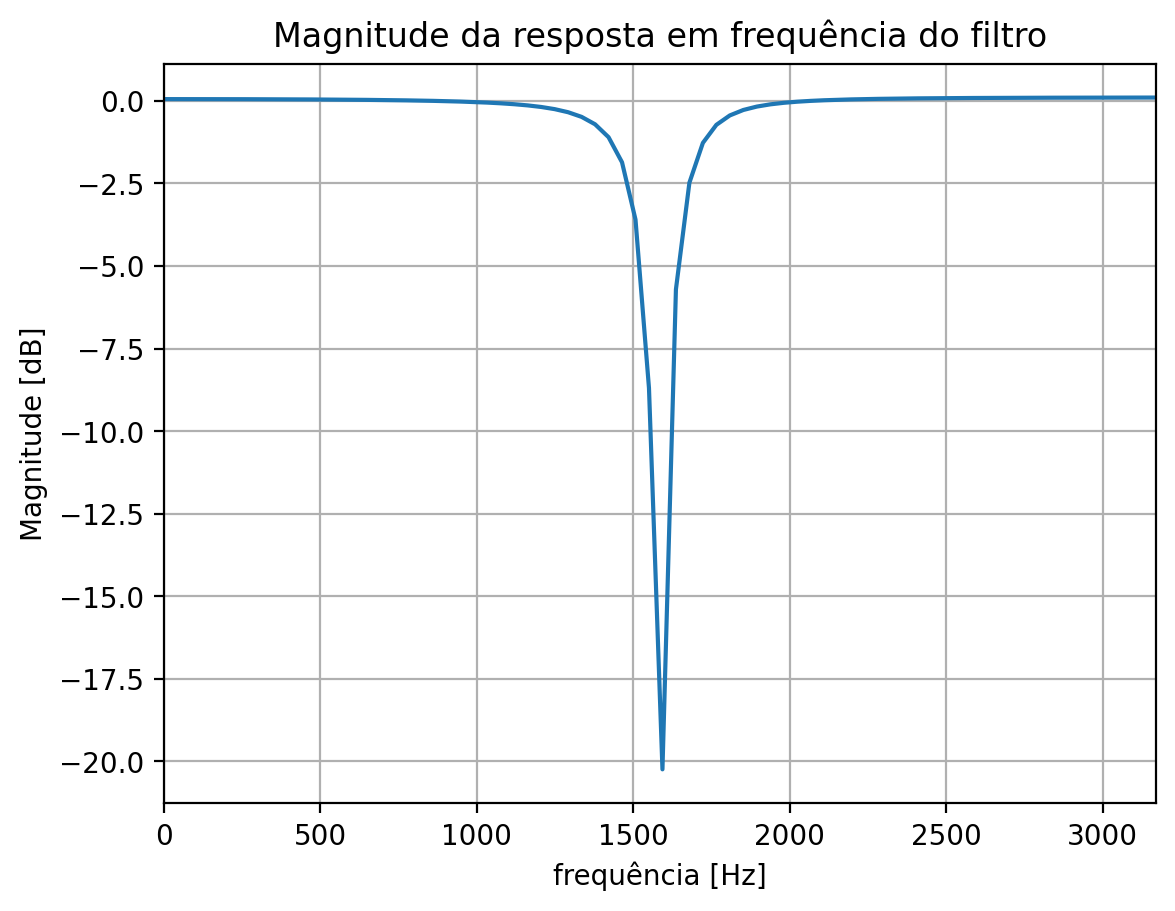

In [ ]:
freq_spread = 200

# Filtro usando Biblioteca Signal
# Q = filter_freq / freq_spread

B,A = signal.iirnotch(filter_freq, Q, fs=stm32_fs)
print(B,A)
SOS = signal.tf2sos(B,A)
SOS_to_STM32(SOS)

B,A = signal.iirnotch(filter_freq, Q, fs=fs)
SOS = signal.tf2sos(B,A)
w, H = signal.sosfreqz(SOS)

plt.plot(fs/2 * w/np.pi , 20*np.log10(abs(H)))
plt.title('Magnitude da resposta em frequência do filtro')
plt.xlabel('frequência [Hz]')
plt.ylabel('Magnitude [dB]')
plt.xlim([0, filter_freq*2])
plt.grid()
plt.show()

# Filtro usando Artigo
alpha = 1
rho = 0.975

B,A = notch_filter(alpha,rho,filter_freq,stm32_fs)
print(B,A)
SOS = signal.tf2sos(B,A)
SOS_to_STM32(SOS)

B,A = notch_filter(alpha,rho,filter_freq,fs)
SOS = signal.tf2sos(B,A)
w, H = signal.sosfreqz(SOS)

plt.plot(fs/2 * w/np.pi , 20*np.log10(abs(H)))
plt.title('Magnitude da resposta em frequência do filtro')
plt.xlabel('frequência [Hz]')
plt.ylabel('Magnitude [dB]')
plt.xlim([0, filter_freq*2])
plt.grid()
plt.show()

## Sinal filtrado em Software:

Áudio Filtrado por filtro Notch IRR


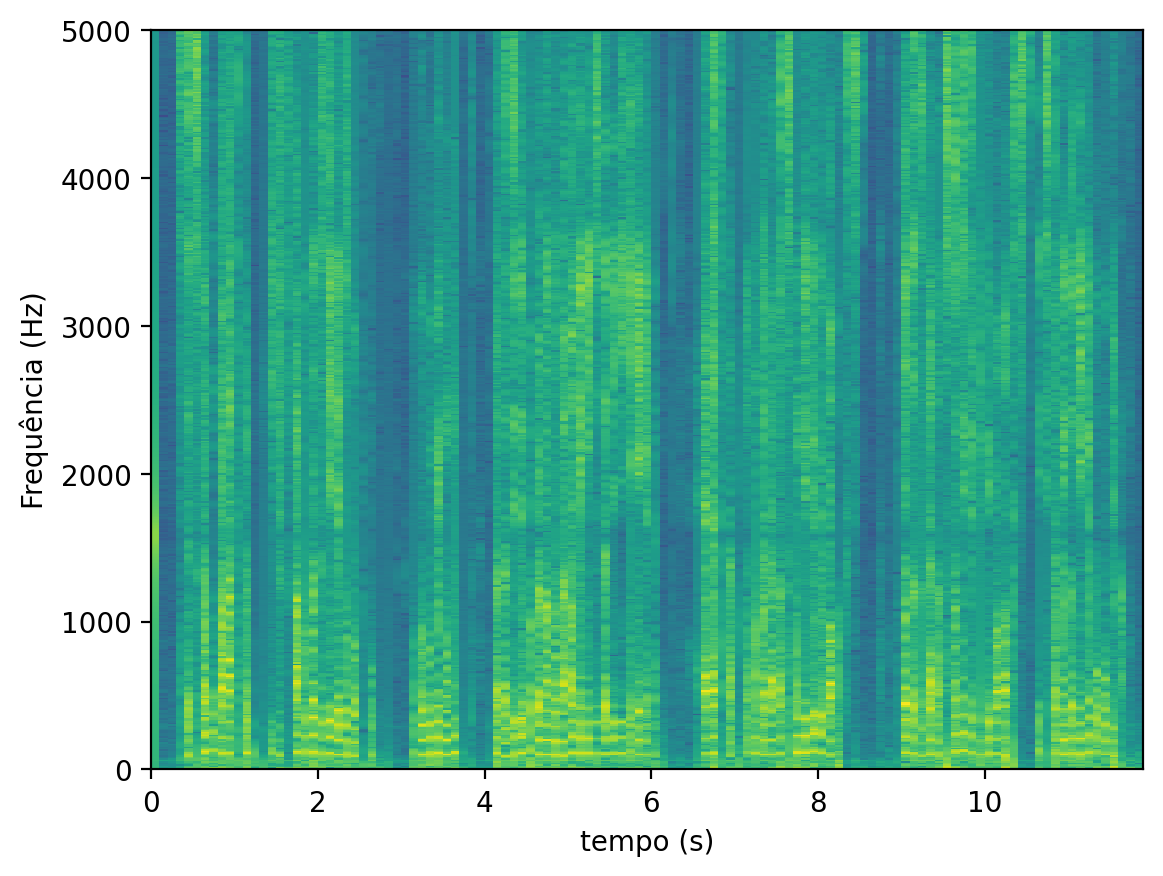

In [ ]:
# Filter signal
audio_filtrado_notch = signal.sosfilt(SOS, audio)

print('Áudio Filtrado por filtro Notch IRR')
display(Audio(audio_filtrado_notch, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_filtrado_notch, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 5000])
plt.show()

## Sinal filtrado em hardware:

In [ ]:
# Gravação filtro usando biblioteca Signal
filename = "gravacao stm32 notch signal.wav"
audio_hardware,fs = sf.read(filename)

display(Audio(audio_hardware, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_hardware, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 5000])
plt.show()

# Gravação filtro usando filtro do artigo
filename = "gravacao stm32 notch artigo.wav"
audio_hardware,fs = sf.read(filename)

print("Sinal filtrado em hardware: Ponto Flutuante 32 bits")
display(Audio(audio_hardware, rate=fs))

window_size = int(fs/10)
window = signal.windows.boxcar(window_size)
freq,tempo,potencia = signal.spectrogram( audio_hardware, fs, window, noverlap=0 )
plt.pcolormesh(tempo, freq, potencia**0.05) # Usado a raiz para "expandir" os dados e melhorar a visualização na pcolormesh
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.ylim([0, 5000])
plt.show()

A saída desta célula é muito grande e só pode ser exibida após o login.


## Comparando IRR Cássico com NOTCH

Como é possível ver nos spectrogramas e ouvir nos áudios, o filtro Notch tem o desempenho muito superior **para esta aplicação**, e utilizando menos recursos de hardware

#    


In [ ]:
!wget -O make.py https://raw.githubusercontent.com/JonasGMorsch/ColabMakePDF/master/make.py
import make; make.html()

--2024-04-17 13:37:06--  https://raw.githubusercontent.com/JonasGMorsch/ColabMakePDF/master/make.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1292 (1.3K) [text/plain]
Saving to: ‘make.py’

make.py             100%[===================>]   1.26K  --.-KB/s    in 0s      

2024-04-17 13:37:06 (85.5 MB/s) - ‘make.py’ saved [1292/1292]

Downloading...
From: https://drive.google.com/uc?id=12MLohSsBH6beidiR0l9VH5UC3jVV8pdl
To: /content/9 - Atividade dos filtros rejeita-faixa.ipynb
100% 7.09M/7.09M [00:00<00:00, 15.6MB/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>